In [22]:
%load_ext autoreload
%autoreload 2

In [24]:
from algorithmic_efficiency import scoring

In [25]:
import pickle

In [49]:
workload_metadata = {
    'imagenet_vit': {
        'target': 0.227969995,
        'metric': 'valid/error_rate',
    },
    'mlperf_imagenet_mlperf_resnet': {
        'target': 0.23241999,
        'metric': 'valid/error_rate',
    },
    'translate_wmt_xformer_translate': {
        'target': 1.36375005,
        'metric': 'valid/ce_loss',
    },
    'fastmri_unet': {
        'target': 0.28693937,
        'metric': 'valid/l1_loss',
    },
    'ogbg_molpcba_gnn': {
        'target': 0.2806787281,
        'metric': 'valid/average_precision',
    },
    'librispeech_conformer': {
        'target': 0.1099208315,
        'metric': 'valid/wer',
    },
    'librispeech_deepspeech': {
        'target': 0.1290709079,
        'metric': 'valid/wer',
    },
    'criteo1tb_dlrm': {
        'target': 0.12555291,
        'metric': 'valid/ce_loss',
    },
}

In [58]:
with open('~/submissions.pkl', 'rb') as f:
    submissions = pickle.load(f)
del submissions['submission.baseline_nesterov_big_linear']

In [66]:
for submission, results in submissions.items():
    results['workload'] = results[['dataset', 'model']].agg('_'.join, axis=1)
    submissions[submission] = results

In [67]:
perf_df = scoring.compute_performance_profiles(submissions, workload_metadata)


Computing performance profile with respect to `global_step` for submission.baseline_adam1
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
Submission did not reach target
  hparams:
  - attention_dropout_rate: 0.1
  - batch_size: 256
  - dec_cross_attn_kernel_init: xavier_uniform
  - dec_num_layers: 6
  - dec_self_attn_kernel_init: xavier_uniform
  - decode: False
  - dropout_rate: 0.1
  - emb_dim: 1024
  - enc_num_layers: 6
  - enc_self_attn_kernel_init: xavier_uniform
  - grad_clip: None
  - l2_decay_factor: None
  - l2_decay_rank_threshold: 0
  - label_smoothing: 0.1
  - layer_rescale_factors: {}
  - logits_via_embedding: True
  - lr_hparams: {'schedule': 'constant', 'base_lr': 0.000630733780295768}
  - mlp_dim: 2048
  - model_dtype: float32
  - normalizer: pre_laye

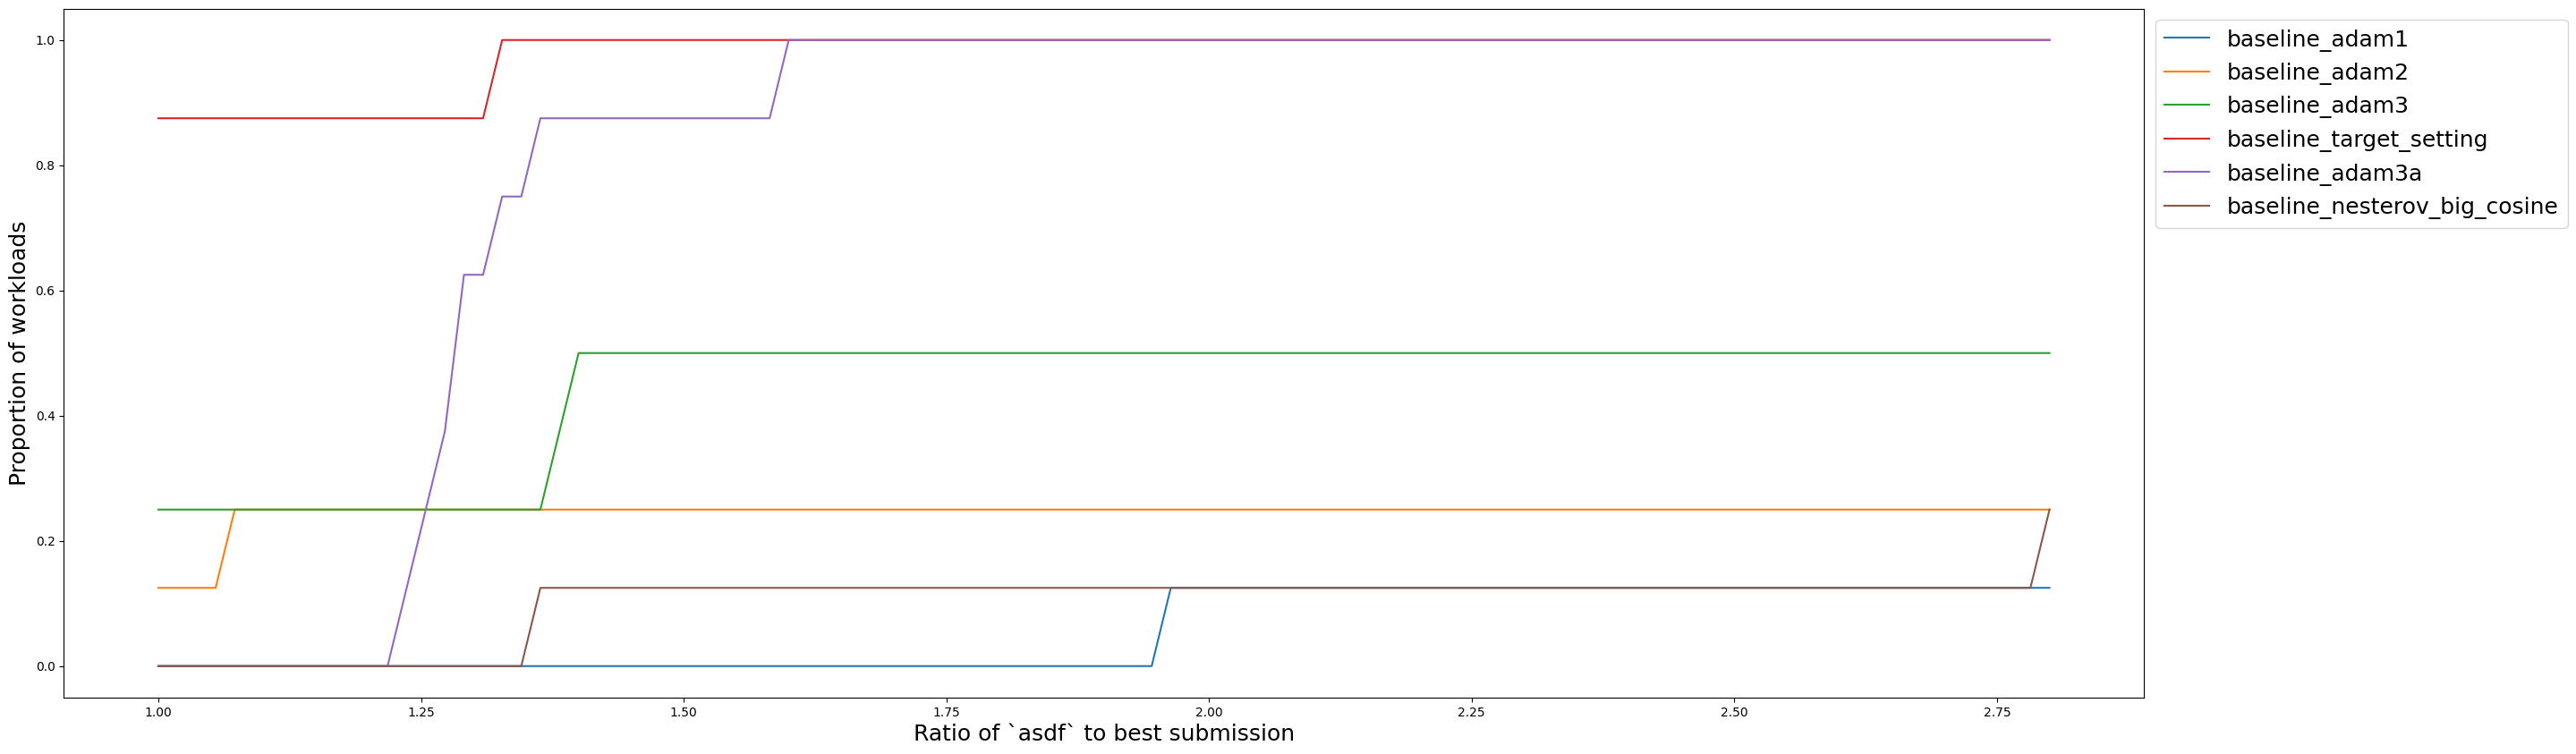

In [64]:
scoring.plot_performance_profiles(perf_df, 'asdf')

In [65]:
scoring.compute_leaderboard_score(perf_df, normalize=False)

,score
submission,
baseline_adam1,0.105682
baseline_adam2,0.442045
baseline_adam3,0.804545
baseline_target_setting,1.760227
baseline_adam3a,1.479545
baseline_nesterov_big_cosine,0.181818
